## Load data from Data Wrangling Notebook

In [1]:
import pandas as pd

df = pd.read_parquet(
    "/kaggle/input/data-wrangling/final_features.parquet"
)

df.head()

,userId,movieId,binary_rating,review_year,review_month,review_dow,n_user_tags,avg_user_tag_len,has_user_tag,movie_year,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2,0,2005,4,5,NaN,NaN,NaN,1995,...,0,0,0,0,0,0,0,0,0,0
1,1,29,0,2005,4,5,NaN,NaN,NaN,1995,...,0,0,0,0,1,0,1,0,0,0
2,1,32,0,2005,4,5,NaN,NaN,NaN,1995,...,0,0,0,0,1,0,1,1,0,0
3,1,47,0,2005,4,5,NaN,NaN,NaN,1995,...,0,0,0,0,1,0,0,1,0,0
4,1,50,0,2005,4,5,NaN,NaN,NaN,1995,...,0,0,0,0,1,0,0,1,0,0


In [2]:
df.isna().sum()

userId                         0
movieId                        0
binary_rating                  0
review_year                    0
review_month                   0
review_dow                     0
n_user_tags             19874180
avg_user_tag_len        19874180
has_user_tag            19874180
movie_year                     0
movie_age                      0
genome_mean               199820
genome_max                199820
genome_std                199820
genome_n_strong_tags      199820
Action                         0
Adventure                      0
Animation                      0
Children                       0
Comedy                         0
Crime                          0
Documentary                    0
Drama                          0
Fantasy                        0
Film-Noir                      0
Horror                         0
IMAX                           0
Musical                        0
Mystery                        0
Romance                        0
Sci-Fi    

Impute all the missing values to be 0

In [3]:
df['n_user_tags']= df['n_user_tags'].fillna(0)
df['avg_user_tag_len']= df['avg_user_tag_len'].fillna(0)
df['has_user_tag']= df['has_user_tag'].fillna(0)
df['genome_mean']= df['genome_mean'].fillna(0)
df['genome_max']= df['genome_max'].fillna(0)
df['genome_std']= df['genome_std'].fillna(0)
df['genome_n_strong_tags']= df['genome_n_strong_tags'].fillna(0)
df.isna().sum()

userId                  0
movieId                 0
binary_rating           0
review_year             0
review_month            0
review_dow              0
n_user_tags             0
avg_user_tag_len        0
has_user_tag            0
movie_year              0
movie_age               0
genome_mean             0
genome_max              0
genome_std              0
genome_n_strong_tags    0
Action                  0
Adventure               0
Animation               0
Children                0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Fantasy                 0
Film-Noir               0
Horror                  0
IMAX                    0
Musical                 0
Mystery                 0
Romance                 0
Sci-Fi                  0
Thriller                0
War                     0
Western                 0
dtype: int64

Split data into test and train sets

In [4]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, random_state=101)
train_df

,userId,movieId,binary_rating,review_year,review_month,review_dow,n_user_tags,avg_user_tag_len,has_user_tag,movie_year,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3781876,25737,47237,1,2012,10,0,0.0,0.0,0.0,2006,...,0,0,0,0,0,0,0,0,0,0
15914771,110101,2467,0,2008,8,3,0.0,0.0,0.0,1986,...,0,0,0,0,1,0,0,1,0,0
7429072,51245,7367,0,2009,8,1,0.0,0.0,0.0,2004,...,0,0,0,0,0,0,0,0,0,0
8971180,62022,1580,1,2003,8,0,0.0,0.0,0.0,1997,...,0,0,0,0,0,0,1,0,0,0
9611455,66500,3189,0,2003,12,6,0.0,0.0,0.0,1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12287369,84862,237,0,1996,11,5,0.0,0.0,0.0,1995,...,0,0,0,0,0,1,0,0,0,0
5713995,39316,160,0,1996,10,5,0.0,0.0,0.0,1995,...,0,0,0,0,1,0,1,0,0,0
311895,2129,592,0,1996,7,2,0.0,0.0,0.0,1989,...,0,0,0,0,0,0,0,1,0,0
1525073,10321,992,0,1998,10,1,0.0,0.0,0.0,1996,...,0,0,0,0,0,0,0,1,0,0


**Feature Engineering**

As each user has a unique way of rating each movie, the user_stats dataframe will be created to summarize each user's information. Only this information for the train set will be used to avoid data leakage.

* user_n_ratings : how many ratings a user has rated
* user_pos_rate : the typical rating for a user
This dataframe is then merged with dataframes of both train and test sets.

In [5]:
user_stats = (
    train_df.groupby("userId", sort=False)
        .agg(
            user_n_ratings=("binary_rating", "size"), # how many ratings
            user_pos_rate=("binary_rating", "mean"), # what is the typical rating for a user
        )
        .reset_index()
)

user_stats["user_n_ratings"] = user_stats["user_n_ratings"].astype("int32")
user_stats["user_pos_rate"] = user_stats["user_pos_rate"].astype("float32")

train_df = train_df.merge(user_stats, on="userId", how="left")
test_df = test_df.merge(user_stats, on="userId", how="left")
train_df

,userId,movieId,binary_rating,review_year,review_month,review_dow,n_user_tags,avg_user_tag_len,has_user_tag,movie_year,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_n_ratings,user_pos_rate
0,25737,47237,1,2012,10,0,0.0,0.0,0.0,2006,...,0,0,0,0,0,0,0,0,765,0.507190
1,110101,2467,0,2008,8,3,0.0,0.0,0.0,1986,...,0,0,1,0,0,1,0,0,219,0.369863
2,51245,7367,0,2009,8,1,0.0,0.0,0.0,2004,...,0,0,0,0,0,0,0,0,978,0.482618
3,62022,1580,1,2003,8,0,0.0,0.0,0.0,1997,...,0,0,0,0,1,0,0,0,487,0.622177
4,66500,3189,0,2003,12,6,0.0,0.0,0.0,1999,...,0,0,0,0,0,0,0,0,68,0.632353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000192,84862,237,0,1996,11,5,0.0,0.0,0.0,1995,...,0,0,0,1,0,0,0,0,100,0.380000
15000193,39316,160,0,1996,10,5,0.0,0.0,0.0,1995,...,0,0,1,0,1,0,0,0,101,0.504951
15000194,2129,592,0,1996,7,2,0.0,0.0,0.0,1989,...,0,0,0,0,0,1,0,0,30,0.566667
15000195,10321,992,0,1998,10,1,0.0,0.0,0.0,1996,...,0,0,0,0,0,1,0,0,1302,0.413978


**Feature Engineering**

As each movie tends to have different ratings and the number of people who have given reviews, the movie_stats dataframe will be created to summarize each movie's information. Only this information for the train set will be used to avoid data leakage.

* movie_n_ratings : how many ratings a movie has been given
* movie_pos_rate : the mean rate of a movie for getting a review > 4.0
This dataframe is then merged with dataframes of both train and test sets.

In [6]:
movie_stats = (
    train_df.groupby("movieId", sort=False)
        .agg(
            movie_n_ratings=("binary_rating", "size"), # how many ratings
            movie_pos_rate=("binary_rating", "mean"), # mean rate for getting > 4.0
        )
        .reset_index()
)

movie_stats["movie_n_ratings"] = movie_stats["movie_n_ratings"].astype("int32")
movie_stats["movie_pos_rate"] = movie_stats["movie_pos_rate"].astype("float32")

train_df = train_df.merge(movie_stats, on="movieId", how="left")
test_df = test_df.merge(movie_stats, on="movieId", how="left")
train_df

,userId,movieId,binary_rating,review_year,review_month,review_dow,n_user_tags,avg_user_tag_len,has_user_tag,movie_year,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_n_ratings,user_pos_rate,movie_n_ratings,movie_pos_rate
0,25737,47237,1,2012,10,0,0.0,0.0,0.0,2006,...,0,0,0,0,0,0,765,0.507190,2,1.000000
1,110101,2467,0,2008,8,3,0.0,0.0,0.0,1986,...,1,0,0,1,0,0,219,0.369863,4048,0.646492
2,51245,7367,0,2009,8,1,0.0,0.0,0.0,2004,...,0,0,0,0,0,0,978,0.482618,1549,0.231762
3,62022,1580,1,2003,8,0,0.0,0.0,0.0,1997,...,0,0,1,0,0,0,487,0.622177,26749,0.496841
4,66500,3189,0,2003,12,6,0.0,0.0,0.0,1999,...,0,0,0,0,0,0,68,0.632353,1325,0.510189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000192,84862,237,0,1996,11,5,0.0,0.0,0.0,1995,...,0,1,0,0,0,0,100,0.380000,4838,0.337743
15000193,39316,160,0,1996,10,5,0.0,0.0,0.0,1995,...,1,0,1,0,0,0,101,0.504951,11285,0.148959
15000194,2129,592,0,1996,7,2,0.0,0.0,0.0,1989,...,0,0,0,1,0,0,30,0.566667,34460,0.395183
15000195,10321,992,0,1998,10,1,0.0,0.0,0.0,1996,...,0,0,0,1,0,0,1302,0.413978,192,0.166667


Drop ID columns and split into X_train, X_test, y_train and y_test

In [7]:
X_train = train_df.drop(columns=['userId', 'movieId', 'binary_rating'])
y_train = train_df['binary_rating']
X_test = test_df.drop(columns=['userId', 'movieId', 'binary_rating'])
y_test = test_df['binary_rating']

In [8]:
X_test.isna().sum()

review_year                0
review_month               0
review_dow                 0
n_user_tags                0
avg_user_tag_len           0
has_user_tag               0
movie_year                 0
movie_age                  0
genome_mean                0
genome_max                 0
genome_std                 0
genome_n_strong_tags       0
Action                     0
Adventure                  0
Animation                  0
Children                   0
Comedy                     0
Crime                      0
Documentary                0
Drama                      0
Fantasy                    0
Film-Noir                  0
Horror                     0
IMAX                       0
Musical                    0
Mystery                    0
Romance                    0
Sci-Fi                     0
Thriller                   0
War                        0
Western                    0
user_n_ratings             0
user_pos_rate              0
movie_n_ratings         1306
movie_pos_rate

Since there are some missing values in the test sets because there are some movies in the test set that do not exist in the movie summary dataframe, I will impute the missing values to be 0 as if these movies have never received any ratings.

In [9]:
X_test['movie_n_ratings'] = X_test['movie_n_ratings'].fillna(0)
X_test['movie_pos_rate'] = X_test['movie_pos_rate'].fillna(0)
X_test.isna().sum()

review_year             0
review_month            0
review_dow              0
n_user_tags             0
avg_user_tag_len        0
has_user_tag            0
movie_year              0
movie_age               0
genome_mean             0
genome_max              0
genome_std              0
genome_n_strong_tags    0
Action                  0
Adventure               0
Animation               0
Children                0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Fantasy                 0
Film-Noir               0
Horror                  0
IMAX                    0
Musical                 0
Mystery                 0
Romance                 0
Sci-Fi                  0
Thriller                0
War                     0
Western                 0
user_n_ratings          0
user_pos_rate           0
movie_n_ratings         0
movie_pos_rate          0
dtype: int64

In [10]:
X_train.columns

Index(['review_year', 'review_month', 'review_dow', 'n_user_tags',
       'avg_user_tag_len', 'has_user_tag', 'movie_year', 'movie_age',
       'genome_mean', 'genome_max', 'genome_std', 'genome_n_strong_tags',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'user_n_ratings', 'user_pos_rate', 'movie_n_ratings', 'movie_pos_rate'],
      dtype='object')

Since there are 1.5M rows which can be computationally expensive, I will only use 300k rows to do modeling by randomly selecting rows to ensure these selected rows are representative of 1.5M rows as seen by the comparison of ratings in y_sub and y_train.

In [11]:
from sklearn.model_selection import train_test_split

X_sub, _, y_sub, _ = train_test_split(
    X_train,
    y_train,
    train_size=0.02,      # appx. 300k rows
    stratify=y_train,
    random_state=101
)

print("X_sub shape:", X_sub.shape)
print("Positive rate:", y_sub.mean(), "vs full:", y_train.mean())

X_sub shape: (300003, 35)
Positive rate: 0.4997150028499715 vs full: 0.4997152370732198


In [12]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = [
    'review_year', 'review_month', 'review_dow', 'n_user_tags',
    'avg_user_tag_len', 'movie_year', 'movie_age',
    'genome_mean', 'genome_max', 'genome_std', 'genome_n_strong_tags',
    'user_n_ratings', 'user_pos_rate', 'movie_n_ratings', 'movie_pos_rate'
]
binary_features = [
    'has_user_tag', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Split time ints out (treat as categorical)
time_categorical = ['review_month', 'review_dow']
numeric_continuous = [c for c in numerical_features if c not in time_categorical]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

time_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Binary passthrough since it is already 0 and 1
binary_transformer = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_continuous),
        ("time", time_transformer, time_categorical),
        ("bin", binary_transformer, binary_features),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

Create a baseline model (DummyClassifier) first

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import make_pipeline

dummy = DummyClassifier(strategy="most_frequent", random_state=101)

pipe_dummy = make_pipeline(preprocessor, dummy)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

scoring = {
    "roc_auc": "roc_auc",
    "accuracy": "accuracy",
    "f1": "f1",
    "precision": "precision",
    "recall": "recall"
}

result_df = pd.DataFrame(
    cross_validate(
        pipe_dummy,
        X_sub, y_sub,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )
)

result_df

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.p

,fit_time,score_time,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_f1,train_f1,test_precision,train_precision,test_recall,train_recall
0,0.551100,0.307894,0.5,0.5,0.500292,0.500283,0.0,0.0,0.0,0.0,0.0,0.0
1,0.536191,0.300668,0.5,0.5,0.500292,0.500283,0.0,0.0,0.0,0.0,0.0,0.0
2,0.572991,0.320951,0.5,0.5,0.500275,0.500287,0.0,0.0,0.0,0.0,0.0,0.0
3,0.558633,0.304246,0.5,0.5,0.500283,0.500285,0.0,0.0,0.0,0.0,0.0,0.0
4,0.408682,0.202679,0.5,0.5,0.500283,0.500285,0.0,0.0,0.0,0.0,0.0,0.0


Because the data is pretty big, I choose SGDClassifier to make sure the model does not take too long to run. The hyperparameters are selected to make sure that the model can be run fast enough and the results are accurate enough. 

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

sgd_logreg = SGDClassifier(
    loss="log_loss",
    alpha=1e-4,
    max_iter=50,
    tol=1e-3,
    random_state=101
)

pipe_sgd = make_pipeline(preprocessor, sgd_logreg)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

scoring = {
    "roc_auc": "roc_auc",
    "accuracy": "accuracy",
    "f1": "f1",
    "precision": "precision",
    "recall": "recall"
}

result_sgd = pd.DataFrame(
    cross_validate(
        pipe_sgd,
        X_sub, y_sub,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )
)
pipe_sgd.fit(X_sub, y_sub)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['review_year', 'n_user_tags',
                                                   'avg_user_tag_len',
                                                   'movie_year', 'movie_age',
                                                   'genome_mean', 'genome_max',
                                                   'genome_std',
                                                   'genome_n_strong_tags',
                                                   'user_n_ratings',
                                                   'user_pos_rate',
                                                   'movie_n_ratings',
                                                   'movie_pos_rate']),
                                                 ('time',
                                                  Pipeline(steps...
                                                   'review_dow']),
                                                 ('bin', 'passthrough',
                                                  ['has_user_tag', 'Action',
                                                   'Adventure', 'Animation',
                                                   'Children', 'Comedy',
                                                   'Crime', 'Documentary',
                                                   'Drama', 'Fantasy',
                                                   'Film-Noir', 'Horror',
                                                   'IMAX', 'Musical', 'Mystery',
                                                   'Romance', 'Sci-Fi',
                                                   'Thriller', 'War',
                                                   'Western'])],
                                   verbose_feature_names_out=False)),
                ('sgdclassifier',
                 SGDClassifier(loss='log_loss', max_iter=50,
                               random_state=101))])

In [15]:
result_sgd

,fit_time,score_time,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_f1,train_f1,test_precision,train_precision,test_recall,train_recall
0,2.806072,0.314454,0.795271,0.795716,0.720321,0.720415,0.719527,0.720379,0.721154,0.720064,0.717907,0.720694
1,2.828094,0.329138,0.795357,0.795912,0.720771,0.721011,0.718145,0.719136,0.724532,0.723585,0.711870,0.714741
2,3.159597,0.345118,0.795175,0.796977,0.720771,0.722248,0.726340,0.727807,0.711761,0.713133,0.741529,0.743096
3,2.720431,0.302849,0.797914,0.795597,0.722233,0.721528,0.723459,0.722630,0.719876,0.719376,0.727079,0.725914
4,1.956386,0.218195,0.796185,0.796449,0.721900,0.721487,0.721714,0.720748,0.721787,0.722251,0.721642,0.719252


Both test and train accuracy scores obtained are about 0.72. The precision, recall, and F-1 scores for both test and train sets are also around 0.72 which indicates that the model does not overfit nor underfit. This model should be able to generalize to the real-world datasets enough.

## Feature Importance

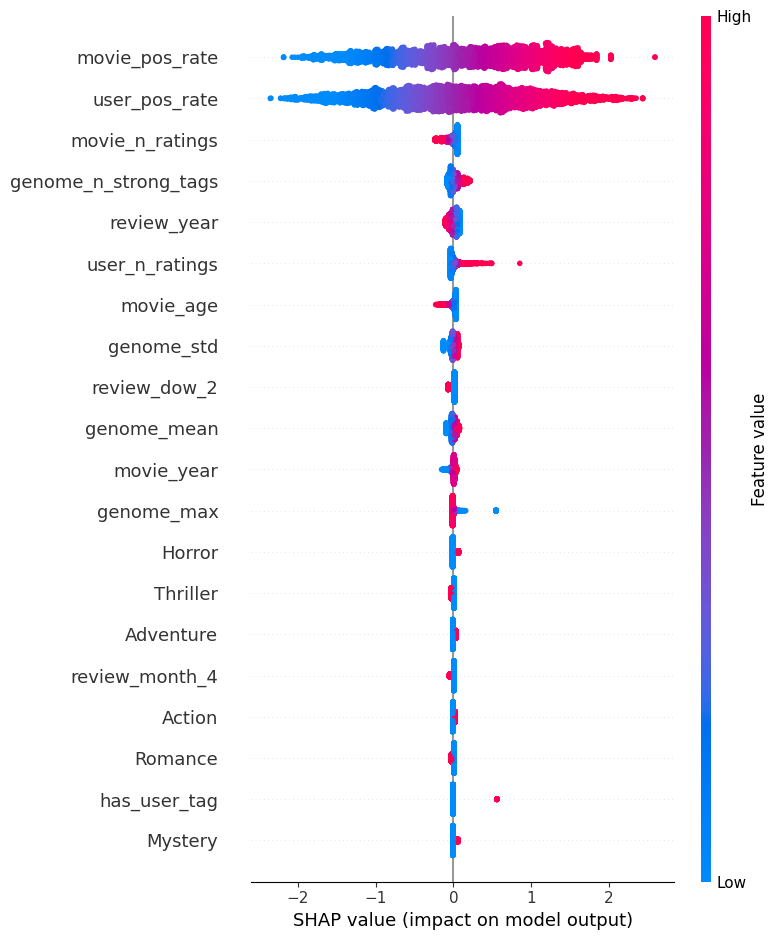

In [16]:
import shap
import numpy as np
import pandas as pd

best_pipe = pipe_sgd   
preprocess = best_pipe.named_steps["columntransformer"]
model = best_pipe.named_steps["sgdclassifier"]

# Transform data
X_train_t = preprocess.transform(X_sub)
X_test_t  = preprocess.transform(X_test)

# Feature names
feature_names = preprocess.get_feature_names_out()

# SHAP explainer for linear models
bg_idx = np.random.choice(X_train_t.shape[0], size=min(2000, X_train_t.shape[0]), replace=False)
background = X_train_t[bg_idx]

explainer = shap.LinearExplainer(model, background)

# Compute SHAP values on a manageable test sample 
n_explain = 5000
X_explain = X_test_t[:n_explain]

shap_values = explainer.shap_values(X_explain)

shap.summary_plot(shap_values, features=X_explain, feature_names=feature_names)

We observe that the most influential features are movie_pos_rate, user_pos_rate, movie_n_ratings, and genome_n_strong_tags.
* movie_pos_rate: Movies with higher historical positive rating rates are more likely to receive a rating above 4.0 from users (i.e., binary_rating = 1)
* user_pos_rate: Users who generally give higher ratings are more likely to assign a rating above 4.0 to a movie.
* movie_n_ratings: Movies with a larger number of ratings tend to be less likely to receive ratings above 4.0, possibly due to a wider range of user opinions that lowers the average rating. In contrast, movies with very few ratings exhibit weaker predictive influence, as reflected by SHAP values close to zero.
* genome_n_strong_tags: Movies with a higher number of strong genome tags are more likely to be rated above 4.0, indicating that richer and more distinctive content characteristics are associated with higher user satisfaction.

## Model Evaluation

Due to a large size of test set, I will only choose random rows to represent the test set and evaluate my model based on them

In [17]:
X_test_sub, _, y_test_sub, _ = train_test_split(
    X_test,
    y_test,
    train_size=0.2,      
    stratify=y_test,
    random_state=101
)

In [18]:
y_pred_sub = pipe_sgd.predict(X_test_sub)

# for ROC AUC
y_prob_sub = pipe_sgd.predict_proba(X_test_sub)[:, 1]

In [19]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

metrics = {
    "accuracy": accuracy_score(y_test_sub, y_pred_sub),
    "precision": precision_score(y_test_sub, y_pred_sub),
    "recall": recall_score(y_test_sub, y_pred_sub),
    "f1": f1_score(y_test_sub, y_pred_sub),
    "roc_auc": roc_auc_score(y_test_sub, y_prob_sub),
}

metrics

{'accuracy': 0.7135317240875869,
 'precision': 0.7086000551197879,
 'recall': 0.7251783796110154,
 'f1': 0.716793372416043,
 'roc_auc': np.float64(0.7868353902458713)}

In [20]:
print(classification_report(y_test_sub, y_pred_sub, digits=4))

              precision    recall  f1-score   support

           0     0.7187    0.7019    0.7102    500096
           1     0.7086    0.7252    0.7168    499917

    accuracy                         0.7135   1000013
   macro avg     0.7136    0.7135    0.7135   1000013
weighted avg     0.7136    0.7135    0.7135   1000013



The scores obtained by the model on the test set are similar to the train and validation scores, so this model is generalized enough.